Estou refazendo o modelo de regressão linear pela quinta vez, na intenção de melhorá-lo. Para isso, vamos seguir os mesmos passos do modelo anterior:

- Carregar os dados e remover as observações com valores ausentes;
- Separar os dados em matriz de entrada X e vetor de saída d;
- Converter as variáveis categóricas em variáveis numéricas usando One-Hot Encoding;
- Padronizar os dados usando StandardScaler;
- Dividir os dados em conjuntos de treinamento e teste;
- Treinar o modelo de regressão linear usando a matriz de treinamento Xtrain e o vetor de saída de treinamento dtrain;
- Calcular as previsões para o conjunto de teste Xteste usando o modelo treinado;
- Calcular o erro quadrático médio (MSE) para avaliar o desempenho do modelo.

Vamos começar carregando os dados e removendo as observações com valores ausentes:

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# carregar dados
df = pd.read_csv("vehicles_cleaned_train.csv")

# remover observações com valores ausentes
df.dropna(inplace=True)

# exibir os primeiros registros do dataframe
df.head()

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,10400,2011,excellent,4 cylinders,gas,81300,automatic,mid-size,sedan
1,6900,2007,excellent,6 cylinders,gas,79000,automatic,full-size,sedan
2,18900,2018,like new,4 cylinders,gas,5000,automatic,full-size,sedan
3,6000,2010,excellent,4 cylinders,gas,97600,automatic,mid-size,hatchback
4,19995,2013,good,6 cylinders,gas,95782,automatic,mid-size,sedan


O próximo passo é separar os dados em matriz de entrada X e vetor de saída d e converter as variáveis categóricas em variáveis numéricas usando One-Hot Encoding. Para isso, vamos utilizar a função get_dummies() do pandas. Vale lembrar que as variáveis de entrada escolhidas para o modelo foram selecionadas com base em sua relação com o preço do carro. As variáveis categóricas condition, cylinders, fuel, transmission, size e type, são importantes indicadores do valor do carro, pois carros em melhor condição, com mais cilindros, com combustíveis mais caros, com transmissões automáticas, maiores e de determinados tipos tendem a ser mais caros. Ter estas variáveis de entrada como parâmetro julgo que ajuda numa previsão mais fidedigna: 

In [2]:
# separar dados em matriz de entrada X e vetor de saída d
X = df.drop('price', axis=1)
d = df['price']

# converter variáveis categóricas em variáveis numéricas usando One-Hot Encoding
X = pd.get_dummies(X, columns=['condition', 'cylinders', 'fuel', 'transmission', 'size', 'type'], drop_first=True)

# exibir os primeiros registros da matriz X
X.head()

,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_6 cylinders,fuel_gas,transmission_manual,size_full-size,size_mid-size,size_sub-compact,type_hatchback,type_sedan,type_wagon
0,2011,81300,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,2007,79000,0,0,0,0,0,1,1,0,1,0,0,0,1,0
2,2018,5000,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,2010,97600,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,2013,95782,0,1,0,0,0,1,1,0,0,1,0,0,1,0


O próximo passo é padronizar os dados usando StandardScaler:

In [3]:
# padronizar dados: isso ajuda melhorar o desempenho do modelo
scaler = StandardScaler()
X = scaler.fit_transform(X)

O próximo passo é dividir os dados em conjuntos de treinamento e teste. Neste exemplo, vamos utilizar 30% dos dados para teste:

In [4]:
# dividir dados em conjunto de treinamento e teste
Xtrain, Xteste, dtrain, dteste = train_test_split(X, d, test_size=0.3, random_state=42)

O próximo passo é treinar o modelo de regressão linear usando a matriz de treinamento Xtrain e o vetor de saída de treinamento dtrain:

In [5]:
# criar modelo de regressão linear
model = LinearRegression()

# model.fit() treina o modelo e faz o ajuste. Isso equivale ao exercício em aula: calcular o vetor W0
model.fit(Xtrain, dtrain)

LinearRegression()

O próximo passo é calcular as previsões para o conjunto de teste Xteste usando o modelo treinado:

In [6]:
# Após treinado e ajustado, uso o model para prever o valor dos carros
ypred_model = model.predict(Xteste)

Podemos plotar a relação entre os valores previstos e reais em um gráfico de dispersão

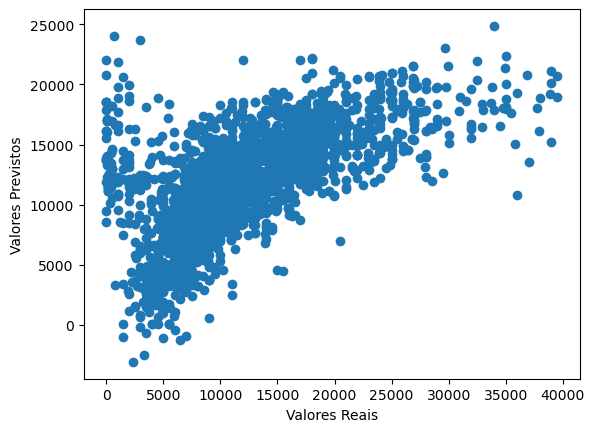

In [7]:
plt.scatter(dteste, ypred_model)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()

Por fim, podemos calcular o erro quadrático médio (MSE) para avaliar o desempenho do modelo:

In [8]:
# calcular erro quadrático médio (MSE)
mse = mean_squared_error(dteste, ypred_model)
print("calcular erro quadrático médio (MSE):", mse)

calcular erro quadrático médio (MSE): 27249315.79987318


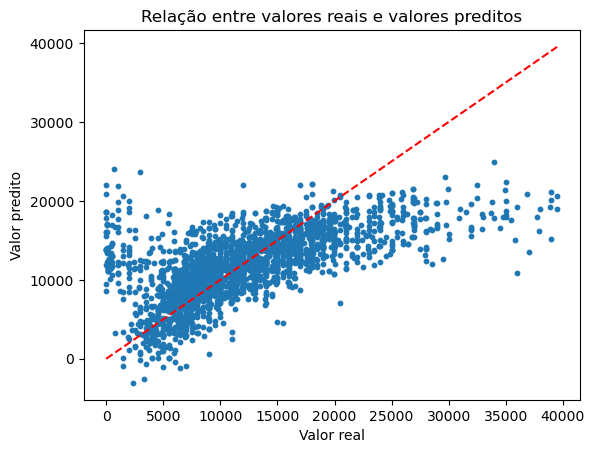

In [9]:
plt.scatter(dteste, ypred_model, s=10)
plt.plot([min(dteste), max(dteste)], [min(dteste), max(dteste)], '--', c='red')
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.title('Relação entre valores reais e valores preditos')
plt.show()

In [10]:
# Carregando o conjunto de dados de teste
dados_test = pd.read_csv('dados_test.csv')
# remover observações com valores ausentes
dados_test.dropna(inplace=True)

# exibir os primeiros registros do dataframe
dados_test.head()

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,11995,2018,excellent,4 cylinders,gas,19000,automatic,mid-size,sedan
1,20500,2017,excellent,6 cylinders,gas,68000,automatic,full-size,sedan
2,15800,2018,like new,4 cylinders,gas,41200,automatic,full-size,sedan
3,20980,2015,excellent,6 cylinders,gas,82845,automatic,mid-size,sedan
4,13999,2019,like new,4 cylinders,gas,29638,automatic,full-size,sedan


In [11]:
# separar dados em matriz de entrada X e vetor de saída d
X = dados_test.drop('price', axis=1)
d = dados_test['price']

# converter variáveis categóricas em variáveis numéricas usando One-Hot Encoding
# 
X = pd.get_dummies(X, columns=['condition', 'cylinders', 'fuel', 'transmission', 'size', 'type'], drop_first=True)

# exibir os primeiros registros da matriz X
X.head()

,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_6 cylinders,fuel_gas,transmission_manual,size_full-size,size_mid-size,size_sub-compact,type_hatchback,type_sedan,type_wagon
0,2018,19000,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,2017,68000,0,0,0,0,0,1,1,0,1,0,0,0,1,0
2,2018,41200,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,2015,82845,0,0,0,0,0,1,1,0,0,1,0,0,1,0
4,2019,29638,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [12]:
# padronizar dados: isso ajuda melhorar o desempenho do modelo
# Especialmente quando as variáveis possuem escalas muito diferentes
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
# dividir dados em conjunto de treinamento e teste
Xtrain, Xteste, dtrain, dteste = train_test_split(X, d, test_size=0.3, random_state=42)

In [14]:
# criar modelo de regressão linear
model = LinearRegression()

# treina o modelo e fazer o ajuste
model.fit(Xtrain, dtrain)

LinearRegression()

In [15]:
ypred_model = model.predict(Xteste)

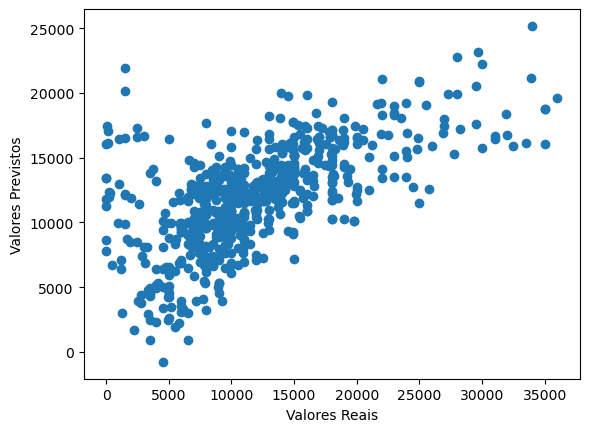

In [16]:
plt.scatter(dteste, ypred_model)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()

In [17]:
# calcular erro quadrático médio (MSE)
mse = mean_squared_error(dteste, ypred_model)
print("calcular erro quadrático médio (MSE):", mse)

calcular erro quadrático médio (MSE): 26521656.705087952


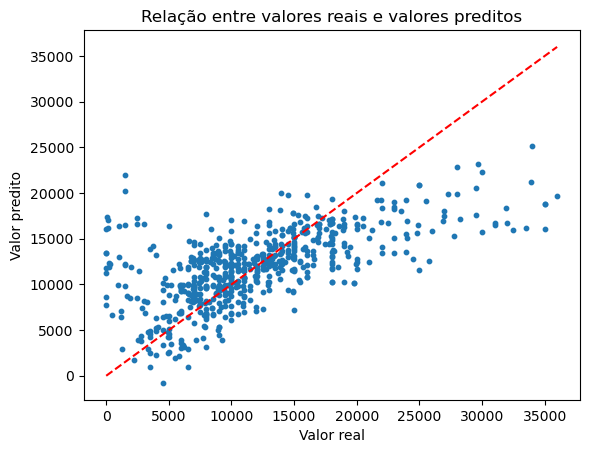

In [18]:
plt.scatter(dteste, ypred_model, s=10)
plt.plot([min(dteste), max(dteste)], [min(dteste), max(dteste)], '--', c='red')
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.title('Relação entre valores reais e valores preditos')
plt.show()

In [19]:
# Separando as variáveis preditoras (X) e a variável alvo (y)
Xteste = dados_test.drop('price', axis=1).values
dteste = dados_test['price'].values

Carro 0: valor real = 11995, valor predito = 8708.168266795356, erro = -3286.8317332046445
Carro 1: valor real = 20500, valor predito = 16634.515268647046, erro = -3865.4847313529535
Carro 2: valor real = 15800, valor predito = 13437.662501464743, erro = -2362.3374985352566
Carro 3: valor real = 20980, valor predito = 11923.22308939181, erro = -9056.77691060819
Carro 4: valor real = 13999, valor predito = 12785.567367443891, erro = -1213.4326325561087
Carro 5: valor real = 7995, valor predito = 9001.997935572557, erro = 1006.9979355725573
Carro 6: valor real = 8995, valor predito = 9093.16281385519, erro = 98.1628138551896
Carro 7: valor real = 19495, valor predito = 11996.722826349956, erro = -7498.277173650044
Carro 8: valor real = 1300, valor predito = 10819.350049522958, erro = 9519.350049522958
Carro 9: valor real = 1000, valor predito = 4564.140306523723, erro = 3564.1403065237228
Carro 10: valor real = 15750, valor predito = 10690.427651812342, erro = -5059.572348187658
Carro 11

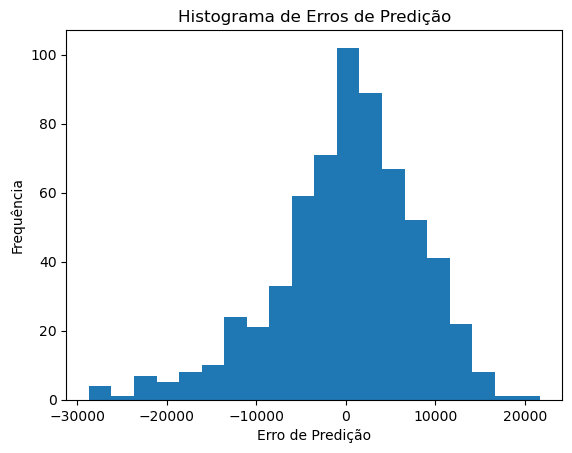

In [20]:
# Lista para armazenar os erros de predição
erro = []

# Loop para calcular os erros e imprimir as informações
for i in range(len(ypred_model)):
    erro_atual = ypred_model[i] - dteste[i]
    erro.append(erro_atual)
    print(f"Carro {i}: valor real = {dteste[i]}, valor predito = {ypred_model[i]}, erro = {erro_atual}")

# Criar um histograma dos erros de predição
plt.hist(erro, bins=20)
plt.xlabel('Erro de Predição')
plt.ylabel('Frequência')
plt.title('Histograma de Erros de Predição')
plt.show()